# Wordclouds for Coffee Beans 

For this segment of the project, I wanted to do a qualitative analysis of the most common words to describe coffee beans by origin/region. Using the blind assesments from each review, I was able to construct a wordcloud that revealed some differing key descriptors for each type of coffee. 


Pros
* Wordclouds are good for getting a general idea of what is being said about the coffee type and they are informative at a glance
* They are also aesthetically pleasing to look at, as they can be masked onto with any shape/logo. In my case, I used coffee beans

Cons
* Wordclouds are NOT meant to be used for quantitative analysis, as it shows a relative relationship between the common words used in the reviews


In [1]:
import numpy as np 
import pandas as pd 
import csv 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from Coffee_Functions import origin_sorter
import pycountry
from pycountry_convert import country_alpha2_to_continent_code, convert_continent_code_to_continent_name
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image 
from numpy import asarray

In [5]:
df = pd.read_csv('Coffee_Reviews_data_3.csv', index_col = 0)

In [6]:
df["Coffee_Origin"] = df["Coffee_Origin"].apply(origin_sorter) #simplfying the origin
df['Coffee_Origin'].fillna(value="Other", inplace=True)



In [33]:
def wc(coffee_origin): 
    
    words = '' 

    STOPWORDS2 = STOPWORDS

    add_stopwords = ["cup","note", "mouthfeel", "aroma", "structure","notes"]

    for x in add_stopwords:
        STOPWORDS.add(x)

    stopwords = set(STOPWORDS) 

    for text in df[df["Coffee_Origin"] == coffee_origin]["Blind_assesment"]: 

        text = str(text) 

        tokens = text.split() 

        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, 
                    min_font_size = 1, random_state=1).generate(words)


    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.figtext(0.5,1.05, "Wordcloud for coffee beans from " + str(coffee_origin), ha = "center", fontsize = 25)
    plt.show()

In [8]:
mask_image = Image.open("coffee_mask11.png")


In [9]:
mask_image =  asarray(mask_image)

In [35]:
def coffee_wc(coffee_origin): 
    
    words = '' 

    STOPWORDS2 = STOPWORDS

    add_stopwords = ["cup","note", "mouthfeel", "aroma", "structure","notes"]

    for x in add_stopwords:
        STOPWORDS.add(x)

    stopwords = set(STOPWORDS) 

    for text in df[df["Coffee_Origin"] == coffee_origin]["Blind_assesment"]: 

        text = str(text) 

        tokens = text.split() 

        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, 
                    min_font_size = 1, mask = mask_image, random_state=1).generate(words)


    plt.figure(figsize = (20, 20), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.figtext(0.5,1.05, "Wordcloud for coffee beans from " + str(coffee_origin), ha = "center", fontsize = 25)

    plt.show()

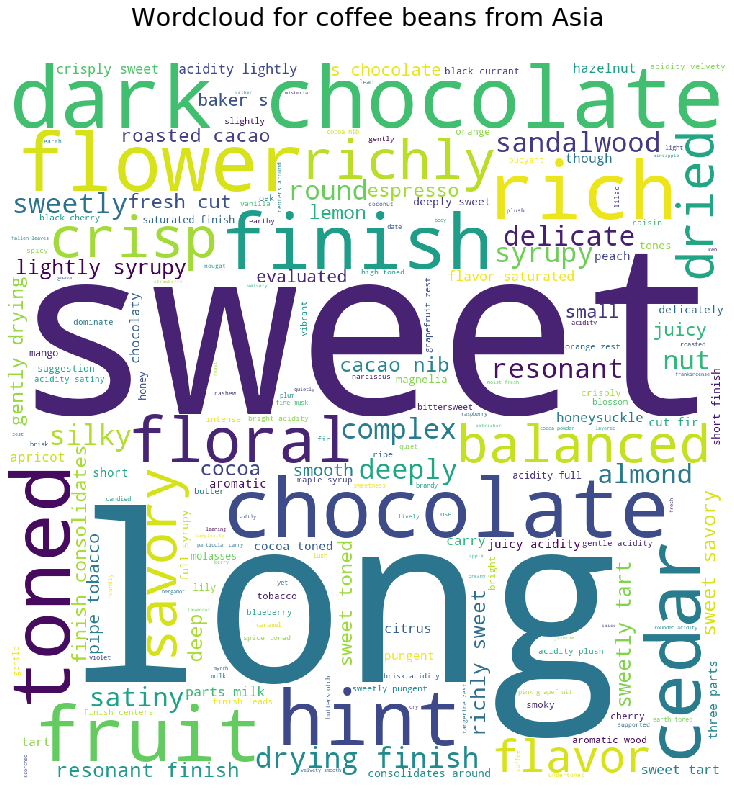

In [36]:
wc("Asia")

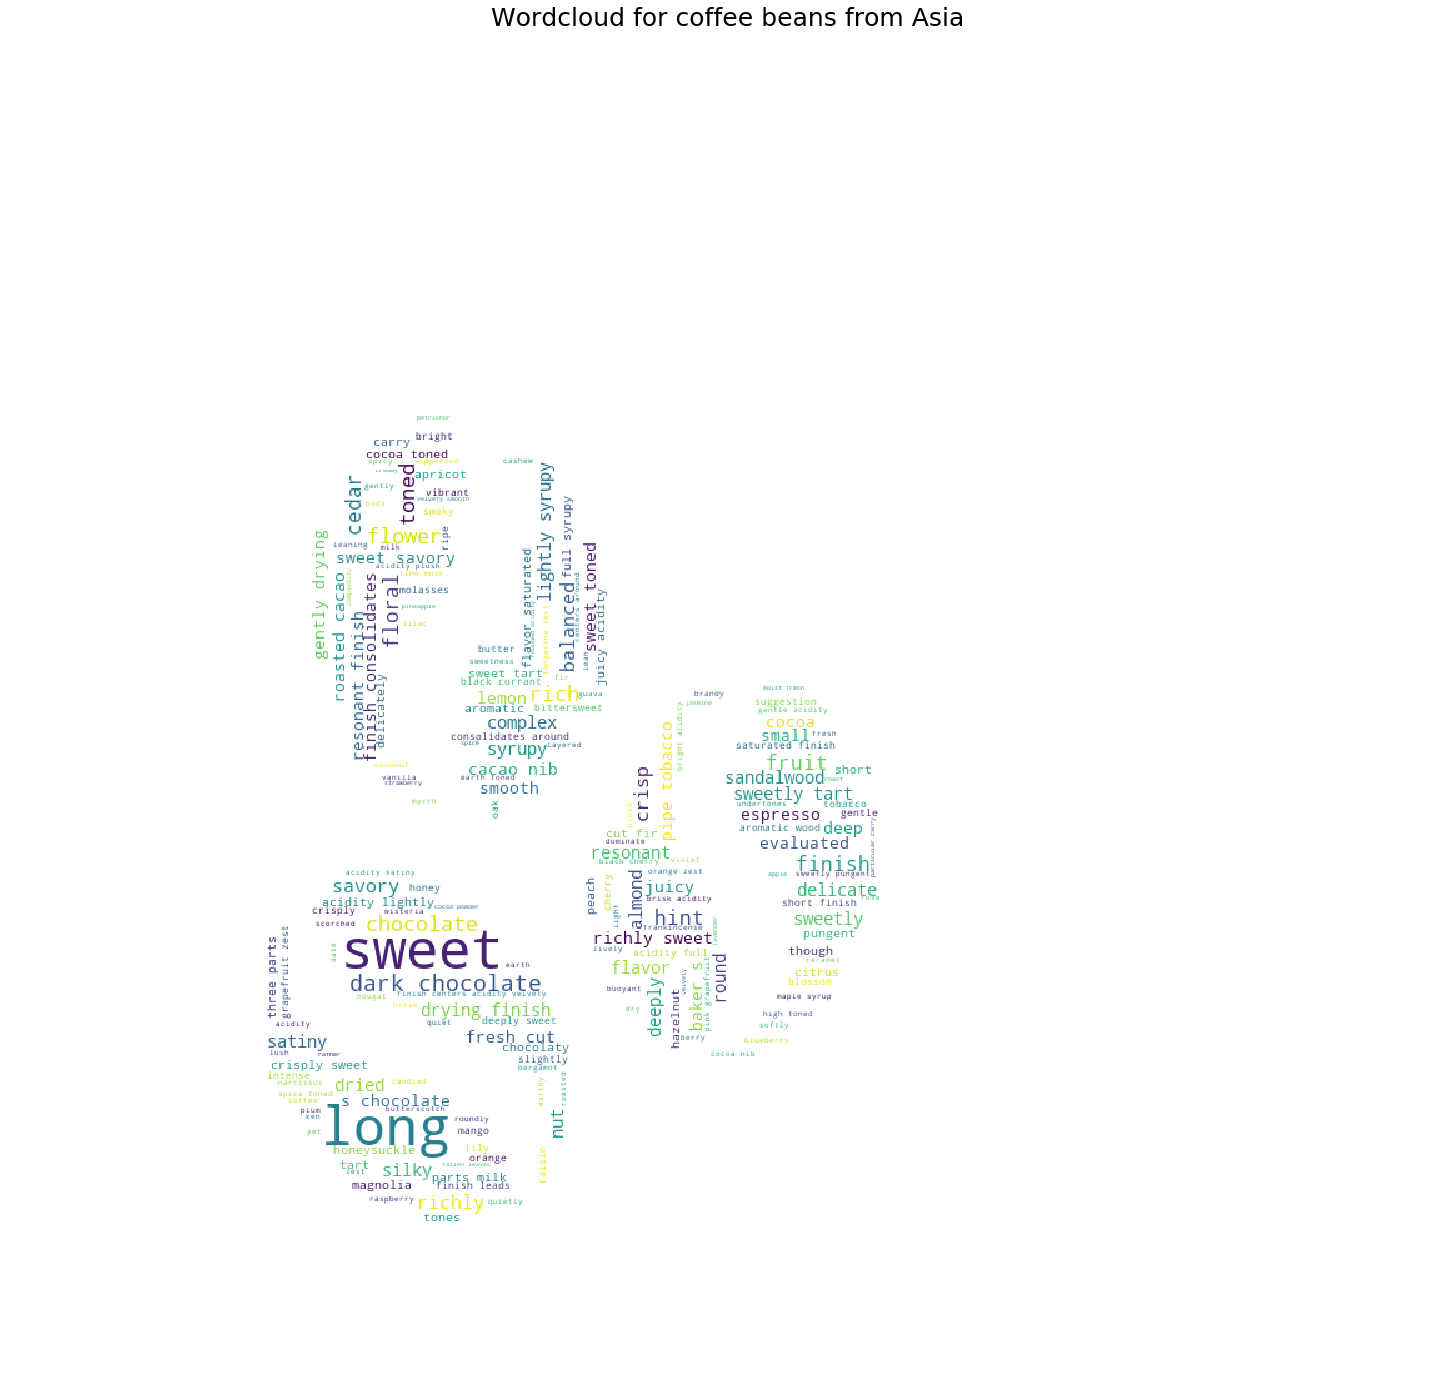

In [37]:
coffee_wc("Asia")

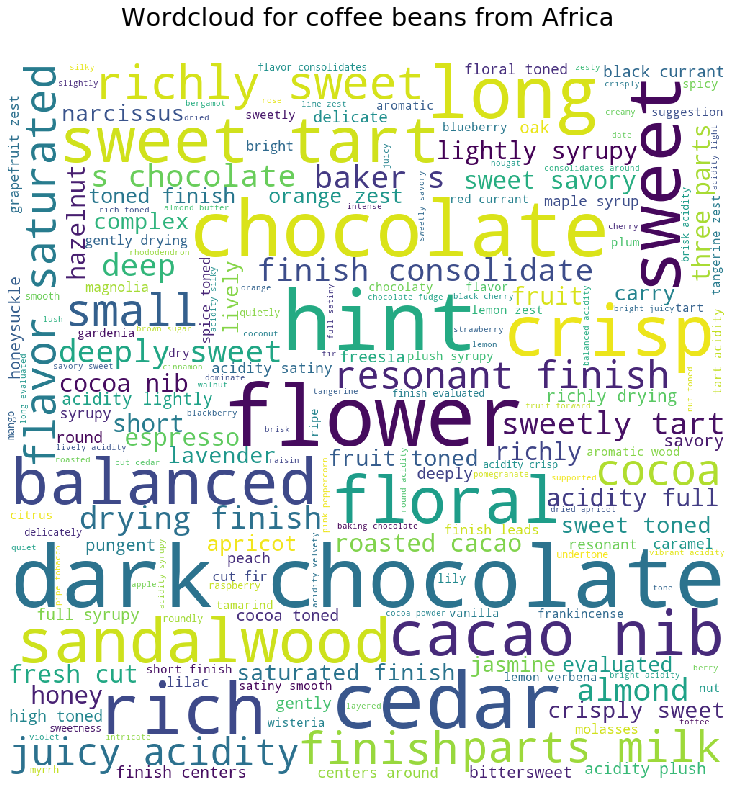

In [38]:
wc("Africa")

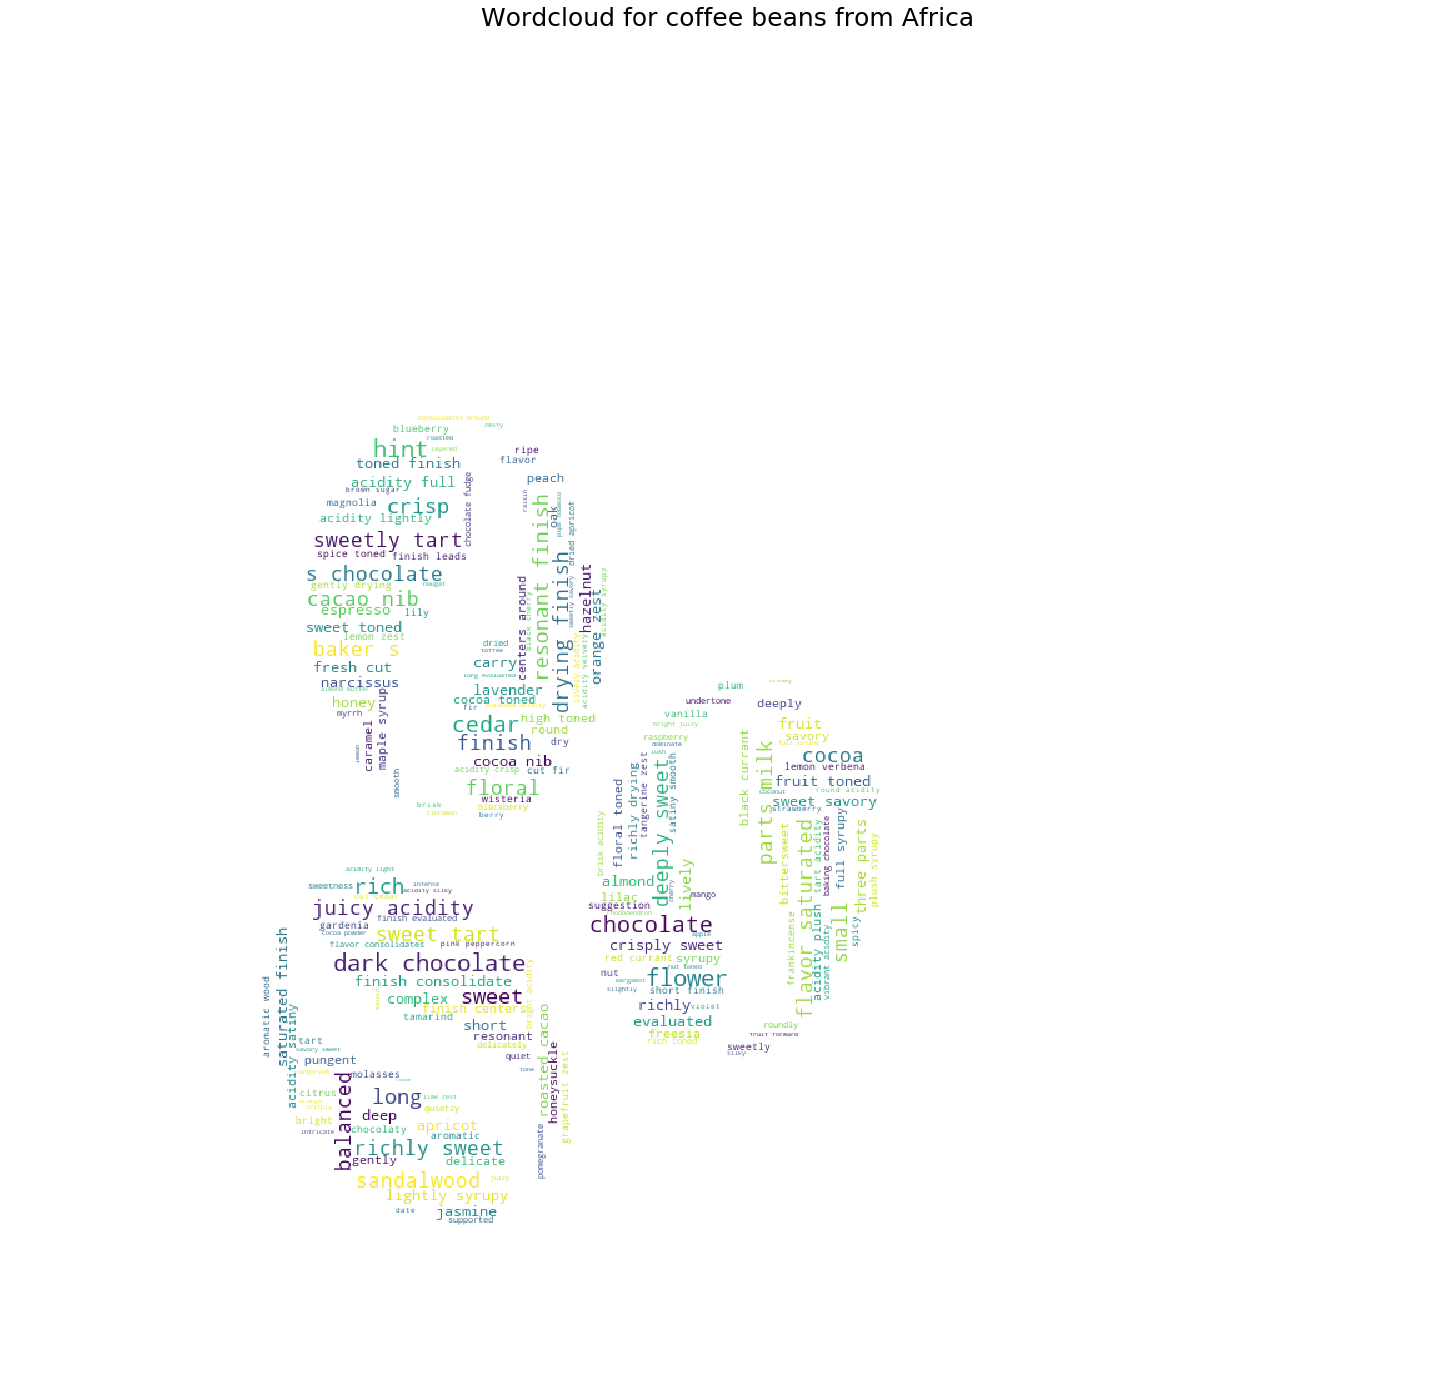

In [39]:
coffee_wc("Africa")

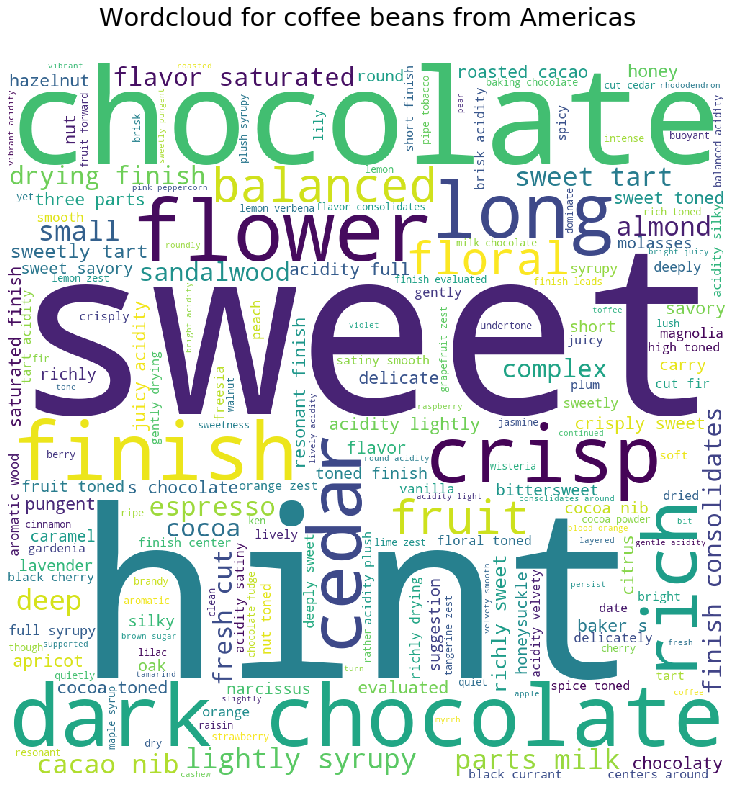

In [40]:
wc("Americas")

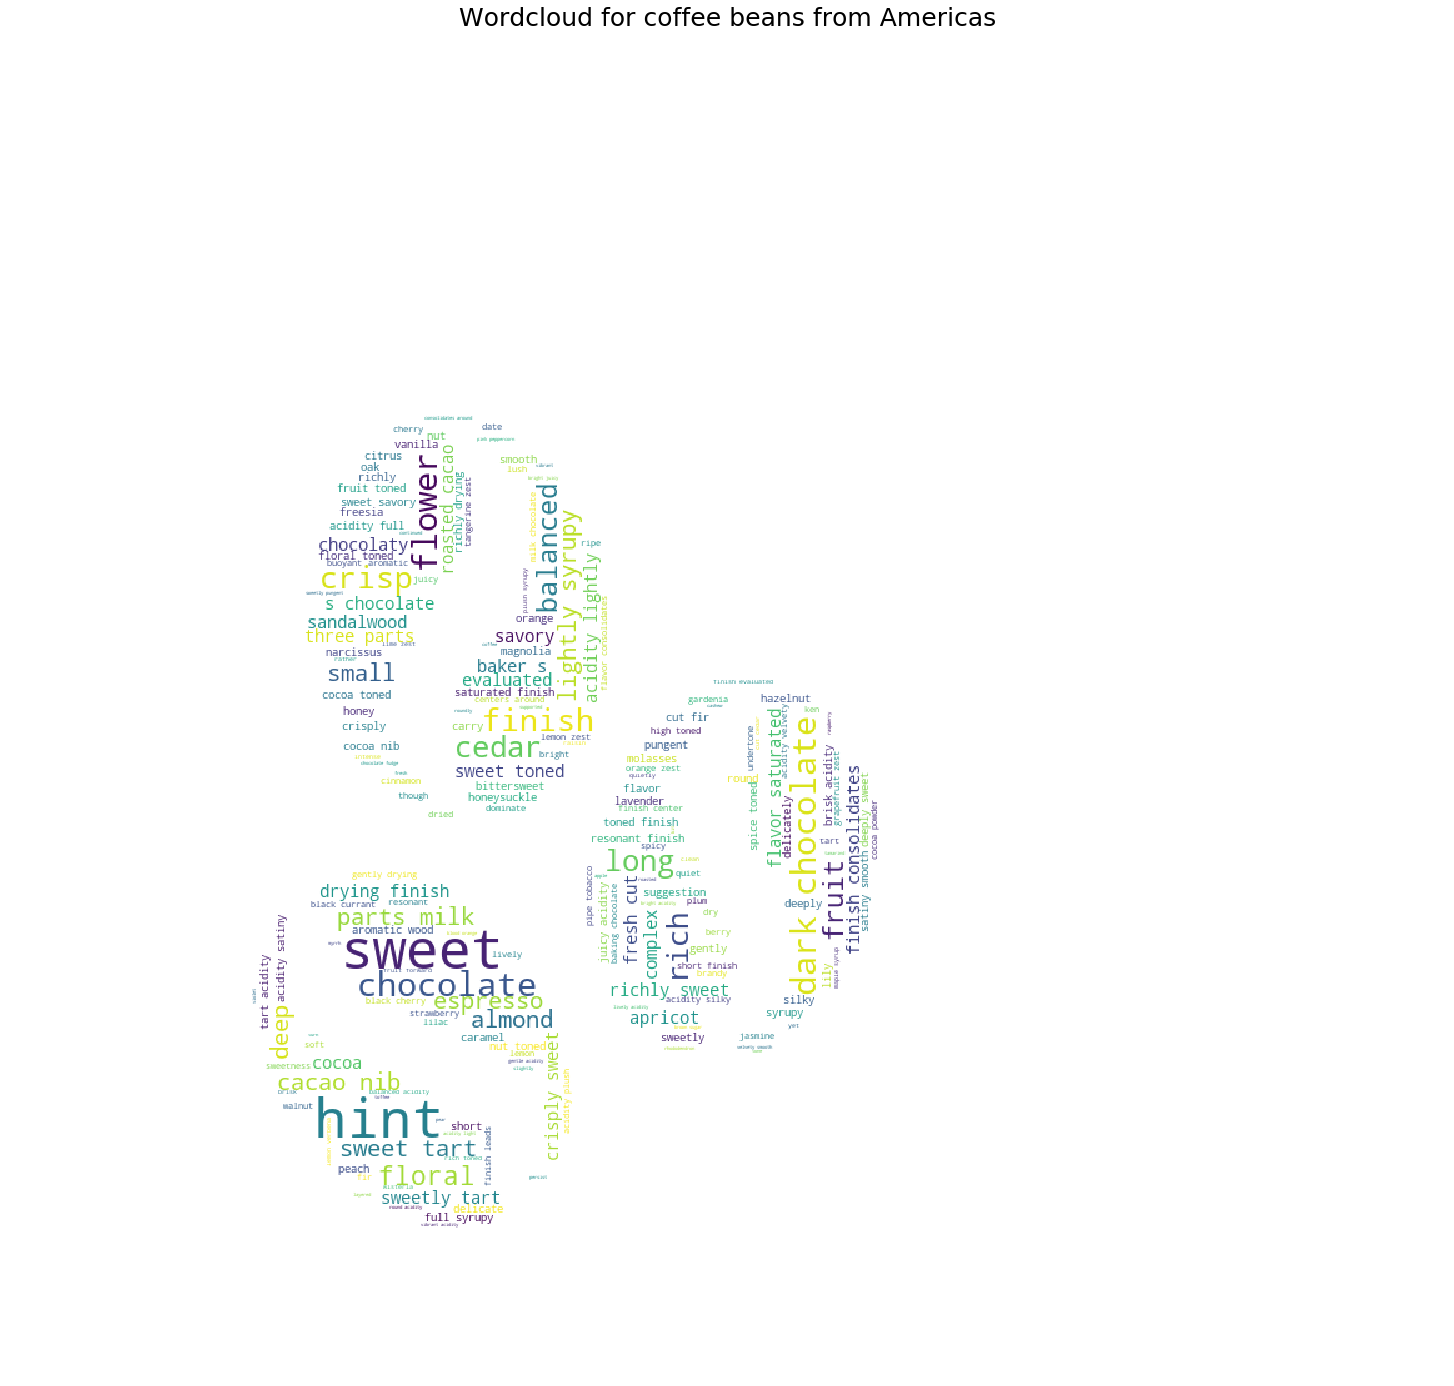

In [41]:
coffee_wc("Americas")

# Conclusion 

From the wordclouds, we can visually see that for each coffee region there are some differing features in the coffee bean flavor profile. For more aesthetic purposes, I repurposed the wordclouds into coffee bean shapes; however, it became harder to see the words listed within the shapes. I listed the key features in the following lists: 
- Asia: sweet, flower, fruit, cedar
- Africa: sandalwood, chocolate, dark chocolate, tart
- Americas: Sweet, chocolate, flower, dark chocolate

